# Analysing Historical Cultures 1

Today we work on historical cultures. The methods are not very different from social analytics, which we have already discussed. But the data is often only available in texts, as your readings have discussed. That’s why we use this opportunity to concentrate on how to analyse texts.

We have already talked about texts a little bit when we were looking at how to analyse the content of tweets. In this session, we will finally find out how to be able to do this by ourselves. Text analysis is an advanced field in the world of computational analytics, and we can rely on a very long tradition of doing text analysis and very established methods. Besides, it is fun and maybe at the same time the dominant form in social and cultural analytics – simply because we work so much with texts, documents, etc.

We will go back further in history and mainly work the US State of the Union Address. This allows to first of all understand a lot about the past state of the political constitution of the USA. The State of the Union (SOTU) data is taken from http://stateoftheunion.onetwothree.net/index.shtml and provides access to the corpus of all the State of the Union addresses from 1790 to 2015 at the time of writing. SOTU allows you to explore how specific words gain and lose prominence over time, and to link to information on the historical context for their use.

We did all the hard work of loading this data for you. It should be available to you as the data frame sotu_all. 

In [1]:
import pandas as pd
import numpy as np
import csv
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

<!-- The dataframe is an rdata file, which python cannot read, luckily python has a package for this.
(Are we going to let the students take this step or do we provide them with a csv file?)
Check out the file, after converting it into a pandas dataframe, by using head() and you will see three columns. The first one contains the full text, the second one the year and the third the exact date in the format YYYYMMDD. -->

In [2]:
# import pyreadr

# data = pyreadr.read_r('data/sotu_all.rda') 

# df = data['sotu_all']
# df.head()

df = pd.read_csv('data/sotu_all.csv')
df.head()

,rownames,speechtext,year,date
0,17900108.html,Fellow-Citizens of the Senate and House of Re...,1790,17900108
1,17901208.html,Fellow-Citizens of the Senate and House of Re...,1790,17901208
2,17911025.html,Fellow-Citizens of the Senate and House of Re...,1791,17911025
3,17921106.html,Fellow-Citizens of the Senate and House of Re...,1792,17921106
4,17931203.html,Fellow-Citizens of the Senate and House of Re...,1793,17931203


You can see the structure of the datframe, but you cannot completely see what is in the speechtext column. Try and print out the first text entry of the dataframe (speechtext).

In [3]:
df['speechtext'][0]

' Fellow-Citizens of the Senate and House of Representatives: I embrace with great satisfaction the opportunity which now presents itself of congratulating you on the present favorable prospects of our public affairs. The recent accession of the important state of North Carolina to the Constitution of the United States (of which official information has been received), the rising credit and respectability of our country, the general and increasing good will toward the government of the Union, and the concord, peace, and plenty with which we are blessed are circumstances auspicious in an eminent degree to our national prosperity. In resuming your consultations for the general good you can not but derive encouragement from the reflection that the measures of the last session have been as satisfactory to your constituents as the novelty and difficulty of the work allowed you to hope. Still further to realize their expectations and to secure the blessings which a gracious Providence has pl

As we saw above, the dataframe also contains the column 'year' and 'date'.

Let's check out the types of these values.

In [4]:
date = df['date'][0]
year = df['year'][0]
print(type(date))
print(type(year))

<class 'numpy.int64'>
<class 'numpy.int64'>


Both of the types are strings! 

But we want the years to be numbers and the dates to be actual dates. This can lead to issues later on when we will analyse the data. Let’s fix that so we can read and use them as the actual date values that they are when analyzing the data later on.

Sotu_all’s date is clearly a date-string in the format YYYYMMDD. Pandas has the powerful pd.to_datetime() function that can parse such character strings and transform them into Python's date objects. The advantage is that we can then compare dates with each other, add dates to other dates, etc.

In [5]:
df['date'] = pd.to_datetime(df['date'])

We can then convert the years into integers by ysing Pandas' to_numeric() function.

In [6]:
df['year'] = pd.to_numeric(df['year'])

Fighting with different formats of date and time is a key part of analysing culture and society. For some past events, for instance, we do not know exact dates or times and have to work with estimates. Sometimes, we only know the approximate time span of when, say, a Roman consul lived. This can cause a lot of issues.

-python package for this?

Runing type() again will confirm  that all the columns are now of the correct type.

In [7]:
date = df['date'][0]
year = df['year'][0]
print(type(date))
print(type(year))

<class 'pandas._libs.tslibs.timestamps.Timestamp'>
<class 'numpy.int64'>


With sotu_all, we have a collection of documents reflecting over 200 years in the history of the US in the words of each president. It is time to do something with it and text mine it. As said, text mining is a very established discipline. Text Mining is the process of deriving meaningful information from natural language text. 

Natural Language Processing is a component of text mining that performs a special kind of linguistic analysis that essentially helps a machine “read” text. The Natural Language Toolkit (NLTK) is a Python package for natural language processing.


-text mining python --> NLTK

In this chapter, we are going to cover some of the most commonly used methods of the NLTK package and employ them to analyse the historical content of the State of the Union speeches. To this end, first we need to create a so-called corpus. A corpus is term originating from the linguistics community. All you need to know about a corpus is that it is basically a collection of text documents. In python, you can create a corpus from many sources (online or local) and from many different formats such as plain text or PDF.
(https://www.nltk.org)

If you are interested, please check online for the many ways NLTK is used. For now we will just need ....

In [8]:
import nltk

The first task we set ourselves is to understand historical policy differences. The last SOTU address of the Republican George W. Bush was in 2008, while the first one of the Democrat Barack Obama was in 2009. These were also the years of the height of a very severe financial crisis. So, we expect interesting changes in content. To identify these, we would like to produce a word cloud to compare the most frequent terms in both speeches in order to understand policy differences. Let us first create a smaller sample of the data containing only the speeches of 2008 and 2009. We can use pandas df.loc by selecting the rows that contain the column value 2008 or 2009 to create a new sotu_2008_2009 data frame containing only the speeches of 2008 and 2009.

In [9]:
sotu_2008 = df.loc[df['year']==2008]
sotu_2009 = df.loc[df['year']==2009]

Now we need to create a corpus. For this we first need to tokenize the words, which means we break the text into units, into words. We are only interested in the full texts and thus only need the values of the column speechtext. So let us first get these texts as strings so that afterwards we can tokenize them.

In [10]:
speechtext_2008 = sotu_2008['speechtext']
text_2008 = speechtext_2008.values
strings_2008 = ''.join(text_2008)

speechtext_2009 = sotu_2009['speechtext']
text_2009 = speechtext_2009.values
strings_2009 = ''.join(text_2009)

In [11]:
from nltk.tokenize import word_tokenize

corpus_2008 = word_tokenize(strings_2008)

corpus_2009 = word_tokenize(strings_2009)


Let us first strip out any extra white space that we do not need by using python's replace(). Such extra whitespace can easily confuse our word recognition. Extra whitespaces can actually be a real issue in historical documents, as they have often been OCR’ed with imperfect recognition. Look it up! There are many cases described on the web. The Bad Data Handbook - Cleaning Up The Data So You Can Get Back To Work by McCallum and published by O’Reilly is an excellent summary of this other side of big data. The bigger the data the more likely it is also somehow ‘bad’!

In [12]:
corpus_2008 = [word.replace(" ", "") for word in corpus_2008]

corpus_2009 = [word.replace(" ", "") for word in corpus_2009]


But as we can see the tokenizer also sees punctuation as words, we need to do something about that. Python has a function isalpha(), that checks whether a token conists only of alphabetic lettters. This will also remove all numbers as they do not add to the content of the speeches. And maybe we also don't want NLTK to distinguish between words with capital and lower letters, so let's get rid of these as well. This makes it easier to count them. Why?

In [13]:
corpus_2008 = [word.lower() for word in corpus_2008 if word.isalpha()]

corpus_2009 = [word.lower() for word in corpus_2009 if word.isalpha()]

When I said earlier that the most frequently used words carry the meaning of a document, I was not entirely telling the truth. There are so-called stopwords such as the, a, or, etc., which usually carry less meaning than the other expressions in the corpus. You will see what kind of words I mean by checking out NLTK's stopwords corpus.

In [14]:
from nltk.corpus import stopwords
stopword_list = list(stopwords.words('english'))
stopword_list

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

Do you agree that these words do not really carry meaning in English? Stopwords should be removed to concentrate on the most important words. Let us do so by checking for each word in our corpus whether it is in the sopwords corpus. 

In [15]:
corpus_2008 = [word for word in corpus_2008 if word not in stopword_list]

corpus_2009 = [word for word in corpus_2009 if word not in stopword_list]

Let us next prepare a simple word cloud for both the corpora, by joining them. For this we will need to install wordcloud, in your terminal type pip install wordcloud.

In [16]:
from wordcloud import WordCloud

def make_wordcloud(corpus):
    wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white',  
                min_font_size = 10).generate(str(corpus)) 
  
    # plot the WordCloud image
    f, ax = plt.subplots(figsize = (8, 8), facecolor = None)
    ax.imshow(wordcloud) 
    plt.axis("off") 
    
    return ax

<AxesSubplot:>

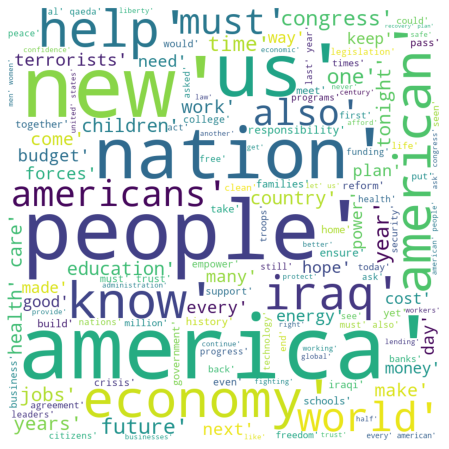

In [17]:
cor = str(corpus_2008)+str(corpus_2009)

make_wordcloud(cor)

 We can clearly see that America is important in 2008 and in 2009 as well as the people of course. More interesting is probably the comparison of the 2008 speech by Bush with the 2009 speech by Obama. But for these we need to create two different corpuses, let's take the same steps as before but now create two corpora, one for 2008 and one for 2009.

<AxesSubplot:>

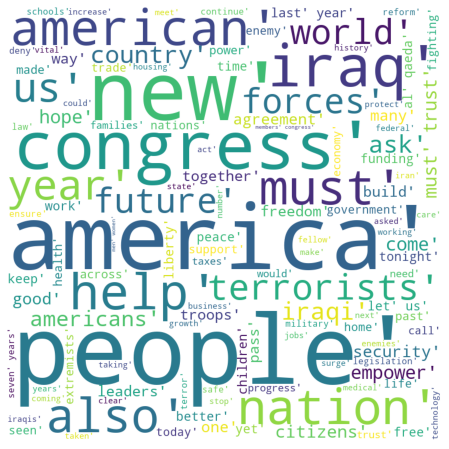

In [18]:
 make_wordcloud(corpus_2008)

<AxesSubplot:>

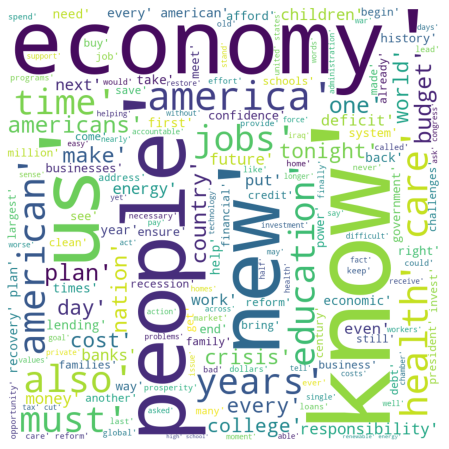

In [19]:
make_wordcloud(corpus_2009)

We can clearly see that Obama concentrated more on the economy while Bush’s favourite topic was the war on terror. We are quite happy with this insight but we also feel we can do better. Wouldn’t it be nice if we could compare not just words but whole topics across documents in a collection? This is what the advanced technique topic modelling does. Topic Modelling is a popular technique in social and cultural analytics that summarises a collection of texts into a predefined number of topics. Have a look at http://journalofdigitalhumanities.org/2-1/topic-modeling-and-digital-humanities-by-david-m-blei/.

Topic modelling is also popular, as it requires only minimal text organisation. Computers can learn topics by themselves. There are, however, known limitations of topic models with regard to the interpretation they help with. There is no guarantee that the automatically derived topics will correspond to what people would consider to be interesting topics/themes. They may be too specific or general, identical to other topics or they may be framings of larger topics, as opposed to genuinely distinct topics. Finally (and in common with other computational analysis techniques), the performance of topic modelling depends upon the quality and structure of the data. In our case the main issue will be that we only have 2 documents, which is not a lot of data. But as topic modelling is computationally quite expensive we should not overdo things here and just concentrate on this small corpus. 

https://towardsdatascience.com/end-to-end-topic-modeling-in-python-latent-dirichlet-allocation-lda-35ce4ed6b3e0 :Topic Models, in a nutshell, are a type of statistical language models used for uncovering hidden structure in a collection of texts. In a practical and more intuitively, you can think of it as a task of:
Dimensionality Reduction, where rather than representing a text T in its feature space as {Word_i: count(Word_i, T) for Word_i in Vocabulary}, you can represent it in a topic space as {Topic_i: Weight(Topic_i, T) for Topic_i in Topics}
Unsupervised Learning, where it can be compared to clustering, as in the case of clustering, the number of topics, like the number of clusters, is an output parameter. By doing topic modeling, we build clusters of words rather than clusters of texts. A text is thus a mixture of all the topics, each having a specific weight.

To create these topic models, we will create an LDA(Latent Dirichlet Allocation) model, using gensim, first install it using pip install gensim.


In [20]:
# We need to install gensim for this
import gensim
import gensim.corpora as corpora

corpus_89 = [corpus_2008,corpus_2009]
Dict = corpora.Dictionary(corpus_89)
texts = corpus_89

# Term Document Frequency
td = [Dict.doc2bow(text) for text in texts]

In [21]:
n = 10

LDA = gensim.models.LdaMulticore(corpus=td,
                                       id2word=Dict,
                                       num_topics=n)

Now we want to print the most keywords in the 10 topics

In [22]:
from pprint import pprint

pprint(LDA.print_topics())

[(0,
  '0.006*"american" + 0.005*"america" + 0.005*"us" + 0.005*"people" + '
  '0.005*"must" + 0.004*"new" + 0.004*"congress" + 0.004*"also" + '
  '0.004*"americans" + 0.004*"nation"'),
 (1,
  '0.007*"people" + 0.006*"america" + 0.006*"must" + 0.006*"us" + 0.006*"new" '
  '+ 0.005*"also" + 0.005*"congress" + 0.005*"economy" + 0.004*"american" + '
  '0.004*"nation"'),
 (2,
  '0.007*"new" + 0.007*"american" + 0.006*"america" + 0.005*"congress" + '
  '0.005*"people" + 0.005*"must" + 0.004*"us" + 0.004*"year" + 0.004*"country" '
  '+ 0.004*"future"'),
 (3,
  '0.006*"american" + 0.006*"must" + 0.006*"people" + 0.006*"new" + 0.005*"us" '
  '+ 0.005*"america" + 0.005*"congress" + 0.004*"nation" + 0.004*"year" + '
  '0.004*"health"'),
 (4,
  '0.008*"america" + 0.007*"people" + 0.006*"new" + 0.005*"american" + '
  '0.005*"must" + 0.005*"years" + 0.004*"year" + 0.004*"us" + 0.004*"world" + '
  '0.004*"also"'),
 (5,
  '0.005*"us" + 0.005*"people" + 0.005*"america" + 0.005*"new" + '
  '0.004*"amer

So how do we interpret this? It shows the top 10 keywords that contribute to each topic. 

For example the keywords for topic 0 are: ‘america’, ‘new’, ‘congress’.. etc and the weight of ‘america’ on topic 0 is 0.007, it shows how important the keyword is to that topic.


In [23]:
LDA.show_topic(topicid=4, topn=20)

[('america', 0.008286577),
 ('people', 0.006989094),
 ('new', 0.005633856),
 ('american', 0.005251153),
 ('must', 0.0050702807),
 ('years', 0.0046538943),
 ('year', 0.0043311603),
 ('us', 0.004023681),
 ('world', 0.0039131227),
 ('also', 0.0038994434),
 ('congress', 0.003777453),
 ('know', 0.0037648974),
 ('health', 0.0037450336),
 ('care', 0.0037086986),
 ('iraq', 0.0034777033),
 ('future', 0.0034539273),
 ('country', 0.0034344143),
 ('economy', 0.003424386),
 ('americans', 0.0033990082),
 ('time', 0.0033184993)]

In [24]:
# Gensim LDA doesn't easily allow for the comparison of the topic models to each of the documents
# other options are possible though, but what would be suited for the assignment?

Not bad. Both word clouds and topic modelling deliver some interesting insights. We now feel confident to explore the whole corpus. In the end, we would like to establish some simple linguistic statistics such as the most frequent words/terms in a collection as well as word trends that tell us about the ups and downs of concepts during the history of policy-making in the USA. Check out http://stateoftheunion.onetwothree.net/sotuGraph/index.html for a visualisation to compare two concepts in the SOTU speeches. 

Let us start by creating first a corpus for each speechtext,

Remember the previous steps? Let's first tokeninze the words

Next, we remove the numbers and whitespaces, please. Do you remember how?

And at last we remove the stopwords

In [25]:
def clean_text(df):
    docs = []
    for index in df.index:
        speech = df.loc[index, 'speechtext']
        text = ''.join(speech)
        words = word_tokenize(text)
        words = [word.replace(" ", "") for word in words]
        words = [word.lower() for word in words if word.isalpha()]
        words = [word for word in words if word not in stopword_list]
        df.loc[index, 'speechtext'] = str(words)
        docs.append(words)
    return docs, df

df2 = df.copy()
docs, df2 = clean_text(df2)
df2

,rownames,speechtext,year,date
0,17900108.html,"['senate', 'house', 'representatives', 'embrac...",1790,1970-01-01 00:00:00.017900108
1,17901208.html,"['senate', 'house', 'representatives', 'meetin...",1790,1970-01-01 00:00:00.017901208
2,17911025.html,"['senate', 'house', 'representatives', 'vain',...",1791,1970-01-01 00:00:00.017911025
3,17921106.html,"['senate', 'house', 'representatives', 'abatem...",1792,1970-01-01 00:00:00.017921106
4,17931203.html,"['senate', 'house', 'representatives', 'since'...",1793,1970-01-01 00:00:00.017931203
...,...,...,...,...
226,20130212.html,"['speaker', 'vice', 'president', 'members', 'c...",2013,1970-01-01 00:00:00.020130212
227,20140128.html,"['speaker', 'vice', 'president', 'members', 'c...",2014,1970-01-01 00:00:00.020140128
228,20150120.html,"['speaker', 'vice', 'president', 'members', 'c...",2015,1970-01-01 00:00:00.020150120
229,20160112.html,"['speaker', 'vice', 'president', 'members', 'c...",2016,1970-01-01 00:00:00.020160112


We are ready to create a document term matrix, we will use tdidf for that.

Sklearn has a nice tool for that, the TfidfVectorizer, https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html
which converts a collection of documents o a matrix of TF-IDF features.

TF-IDF stands for term frequency–inverse document frequency, it shows you how important a word is for a document in a corpus.
(Maybe show the formula here? Do we need more explaining?)

Use the vectorizer to calculate the TF-IDF and then use these values to create a new dataframe, the document term matrix, that shows for each speech (as a column) the word (row) and its tf-idf (value).

In [26]:
import sklearn
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer()
vec = tfidf.fit_transform(df2['speechtext'].values)
 
matrix = pd.DataFrame(vec.toarray().transpose(), index=tfidf.get_feature_names())
 
matrix.columns = df2['year']
matrix.head(20)

year,1790,1790,1791,1792,1793,1794,1795,1796,1797,1798,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
aaa,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.00000,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.00000
aana,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.00000,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.00000
aaron,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.00000,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.00000
abandon,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.02475,...,0.009383,0.0,0.0,0.008981,0.0,0.0,0.0,0.008578,0.0,0.00000
abandoned,0.0,0.0,0.0,0.000000,0.0,0.0,0.027036,0.0,0.0,0.00000,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.00000
abandoning,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.00000,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.00000
abandonment,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.00000,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.01462
abandons,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.00000,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.00000
abate,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.00000,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.00000
abated,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.00000,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.00000


We could also get a word frequency count, which gives a more simple overview by using the same set up but instead we use CountVectorizer

In [27]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
count = vectorizer.fit_transform(df2['speechtext'].values)

counts = pd.DataFrame(count.toarray(),
                      columns=vectorizer.get_feature_names())

count_matrix = pd.DataFrame(count.toarray().transpose(), index=vectorizer.get_feature_names())

count_matrix.columns = df2['year']
count_matrix

year,1790,1790,1791,1792,1793,1794,1795,1796,1797,1798,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
aaa,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
aana,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
aaron,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
abandon,0,0,0,0,0,0,0,0,0,1,...,1,0,0,1,0,0,0,1,0,0
abandoned,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zone,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
zones,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
zoological,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
zooming,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Well we mainly see a lot of zero values, probably because it the words are sorted in alphabetical order. Is there something we could do about that?

We can, for example, sort it in ascending order for a certain year.

In [28]:
count_new = count_matrix.sort_values(by=1791,ascending=False )
count_new

year,1790,1790,1791,1792,1793,1794,1795,1796,1797,1798,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
states,4,3,18,5,24,19,5,16,18,15,...,5,4,6,5,10,12,14,9,6,12
united,4,2,17,5,22,15,5,16,18,14,...,4,5,7,4,6,9,6,7,3,14
may,5,6,13,6,8,12,7,12,8,6,...,1,4,4,7,5,1,3,4,5,1
public,5,5,10,5,7,4,7,11,5,4,...,3,2,5,2,5,3,1,1,2,3
upon,0,0,9,11,3,8,5,2,5,0,...,0,2,1,0,0,1,0,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fading,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
fades,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
faded,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
fade,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


 We can also view only subparts the dataframe and sort for each year seperately and compare them with another year.
 
Let's try and do this for 2016 and 2017

In [29]:
mat_2016 = count_matrix.sort_values(by=2016, ascending=False)
mat_1617 = mat_2016[[2016, 2017]]
mat_1617

year,2016,2017
us,33,20
america,26,29
world,25,17
people,21,15
work,20,10
...,...,...
farmer,0,0
farmed,0,0
farman,0,0
farm,0,0


If we want, we could also check the wordcount of each speech by summing up the values of each of the columns, pandas has a good function for that, look it up.

In [30]:
count_matrix.sum()

year
1790     497
1790     629
1791    1064
1792     961
1793     896
        ... 
2013    3379
2014    3544
2015    3418
2016    2716
2017    2569
Length: 231, dtype: int64

Interesting! If we would run this function on the whole dtm, we could filter out the shortest and longest speeches using the subset, min and max functions. Any idea how? 

But we move on, as we are more interested in the words/terms and their frequencies, which will tell us more about the contents of the various speeches.
We could also use the same function to check how many times a certain word occurs in all of the documents, try it.

In [31]:
word_freq = count_matrix.sum(axis=1)
word_freq

aaa            1
aana           2
aaron          2
abandon       80
abandoned     82
              ..
zone          37
zones         19
zoological     1
zooming        1
zuloaga        5
Length: 23070, dtype: int64

Again, a bit much since there are so many words, let's have a look at the 10 most frequent ones.

In [32]:
word_freq.sort_values(ascending=False)[:10]

government    6951
states        6475
congress      4996
united        4819
people        4064
upon          3956
year          3899
would         3787
country       3422
may           3407
dtype: int64

We can calculate the correlation between two words by calculating the correlation between two dataframe columns (this does mean that we have to transpose the datframe first)

In [33]:
c = count_matrix.T

def find_cors(df, term):
    cors = {}
    for column in c:
        corr = c[term].corr(c[column])
        cors[column] = corr
    return cors

cors = c.corr()
print(cors)

We can find talk on jobs, children, families, etc. and lots of other promises to America. What about peace? Run find_cors() again but then with the term 'peace'

In [86]:
cors_peace = find_cors(df, 'peace')
counts = Counter(cors_peace) 
  
highest = counts.most_common(10)
print(highest)

[('peace', 1.0), ('war', 0.5934693644098213), ('forces', 0.5477506504609714), ('military', 0.5396034510531938), ('nations', 0.5314085270251379), ('army', 0.5254546322919678), ('contributions', 0.5170881559320253), ('peoples', 0.48644654058611475), ('occupation', 0.4742004312536388), ('nation', 0.4714783974953244)]


Well, it seems that peace is mainly a thing of war! Quite sad now about the world, we move on from the simple linguistic statistics we have done so far - mainly based on word frequencies. Next, we enter the domain of word trends, which are currently hotly debated as a digital method. We would like to plot them as we have seen them earlier on the SOTU website. We already have the dataframe for that, the one with all the word counts for each year, let's use that to plot the trend of 'america' over the years.

In [87]:
df_america = c.filter(items = ['america'])
df_america

,america
year,
1790,0
1790,0
1791,0
1792,0
1793,0
...,...
2013,27
2014,34
2015,38


<AxesSubplot:xlabel='year'>

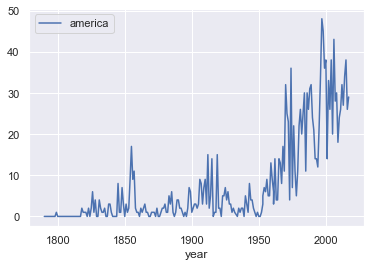

In [88]:
df_america.plot()

For comparison, we add another line-plot about citizens 

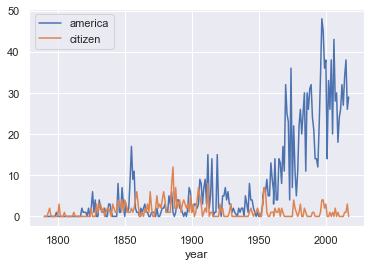

In [89]:
df_compare = c.filter(items = ['america', 'citizen'])
df_compare.plot()
plt.show()

Overall, the plot is not very nice. This is part of the limitation of the built-in plotting function. It is a quick solution but often not a very pretty one. Good for data exploration but not representation! Later in the course, we will meet a much more powerful plotting package called seaborn. As a little preview, we would like to use it next to visualise word trends. Use the same code as above, but before doing so install and import seaborn and type sns.set()

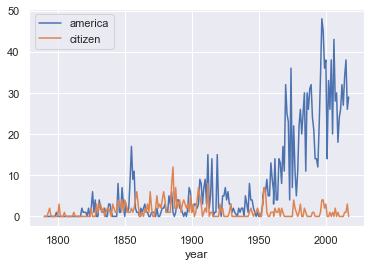

In [90]:
import seaborn as sns

sns.set()
df_compare.plot()
plt.show()

Let’s check what we have learned next.

What does TF-IDF stand for? (Have to find some other answers for these)

1. TextDealingsManager
2. TexasDallasMountains
3. TermDocumentMatrix
4. Don’t know

Term frequency–inverse document frequency

In the content transformation workflow of the tm package for corp_small, how do I transform the content into lower cases?

1. word.lower()
2. tm_map(corp_small, content_transformer(tolower))
3. tm_map(corp_small, removeNumbers)
4. tm_map(corp_small, tolower)

word.lower()

Create a new plot for the historical development of the idea of ‘history’. 

<AxesSubplot:xlabel='year'>

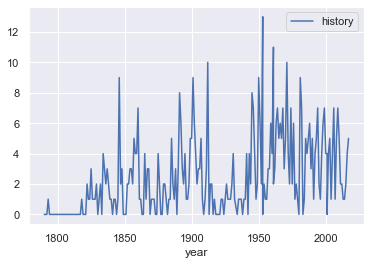

In [91]:
df_history = c.filter(items = ['history'])
df_history.plot()

Find the word associations with ‘history’ in the speeches.

In [92]:
cors_history = find_cors(df, 'history')
counts = Counter(cors_history) 
  
highest = counts.most_common(10)
print(highest)

[('history', 1.0), ('world', 0.5506352648608028), ('years', 0.5299129845559173), ('new', 0.5035340261157771), ('ago', 0.46575563901563594), ('us', 0.4579664853277646), ('people', 0.45311911535390026), ('president', 0.44309687427868005), ('life', 0.4401603707428053), ('peaceful', 0.4398454376297889)]


Within your working group, go back to the ten topics you have found and try and give each of them a title that describes it. Sometimes this is not so easy, because the corpus is quite small. But do try your best.

Let’s move on to the second part of this session.